In [1]:
# TODO: move hiv v(t) to a function and define it below the markdown latex cell
# TODO: use pandas to pretty print vectors
# TODO: can i link to wolframalpha solution for alpha
# TODO: read in bacteria data and plot it
# TODO: plot vt and wt bacteria functions
# TODO: add vt and wt functions


# Chapter 5 Computer Lab 1 HIV/Bacteria

import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import the hiv experimental data

In [3]:
hiv_data_file = "pmls-data-master/01HIVseries/HIVseries.csv"
hiv_data = np.loadtxt(hiv_data_file, delimiter=',')
hiv_num_days = np.array(hiv_data[:,0])
hiv_num_virons = np.array(hiv_data[:,1])
print('hiv data read')

hiv data read


display the hiv data

In [4]:
print("HIV experimental data")
print("______________________")
print("number of days since start of antiretroviral treatment:")
print(hiv_num_days)
print()
print("number of virons in the blood:")
print(hiv_num_virons)

HIV experimental data
______________________
number of days since start of antiretroviral treatment:
[0.     0.0831 0.1465 0.2587 0.4828 0.7448 0.9817 1.2563 1.4926 1.7299
 1.9915 3.0011 4.0109 5.009  5.9943 7.0028]

number of virons in the blood:
[106100.   93240.  166720.  153780.  118800.  116900.  109570.  111350.
  74388.   83291.   66435.   35408.   21125.   20450.   15798.    4785.2]


# $V(t) = Ae^{-at} + Be^{-bt}$

looking at the data above we can see in the recorded data that 

$V(0) = 106100 $

        & 

$V(7.0028) = 4785.2$

assume $B = 0$

In [5]:
B = 0
print(f"B= {B}")

B= 0


assume B = 0

assume beta > alpha

at $V(t=0)$ with $B=0$ we get:

$V(0) = Ae^{-a*0} + 0$


at $V(7.0028)$ with $B=0$ we get:

$V(7,0028) = Ae^{-a*7.0028} + 0$ 


we know the value of $V(0)$ and $V(7.0028)$:

$V(0) = A = 106100$


$V(7.0028) = Ae^{-a*7.0028} = 4785.2$

setting the value of A for $V(7.0028)$ we get:

$V(7.0028) = 106100e^{-a*7.0028} = 4785.2$

$e^{-a*7.0028} = \frac{4785.2}{106100}$

solving for alpha we get:

$\alpha = \frac{2500(log(2) + 3log(5) - log(7) + log(1061) - log(1709))}{17507} = 0.442516$


In [6]:
B = 0
A = 106100
beta = 1
alpha = 0.442516

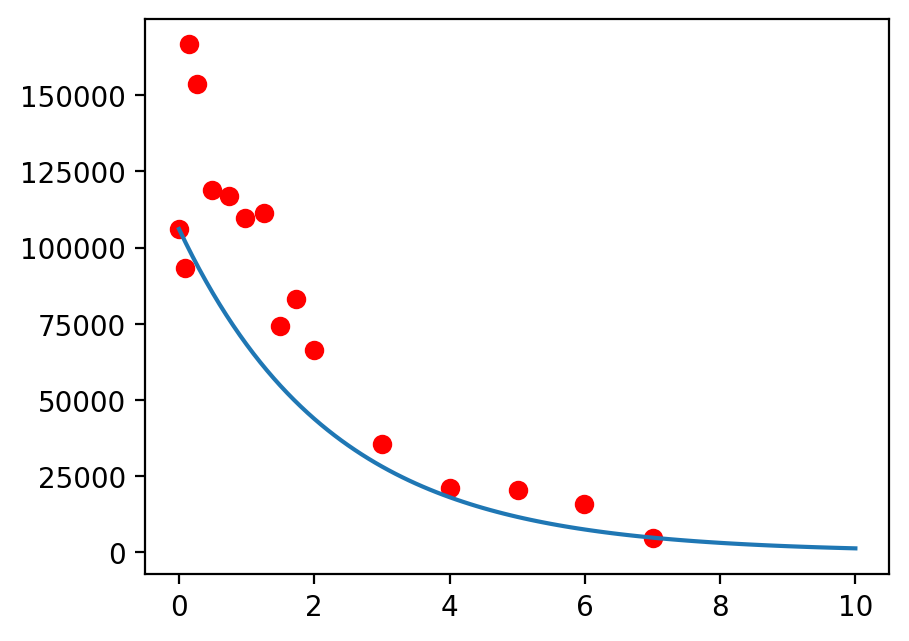

In [7]:

plt.plot(hiv_num_days, hiv_num_virons, 'ro')
t = np.linspace(0, 10, 101)
v_t = A*np.e**(-alpha*t) + B*np.e**(-beta*t)
plt.plot(t, v_t)

alternative parameters where B=0 still and beta > alpha but paramets tuned by adjustments to $10^x$

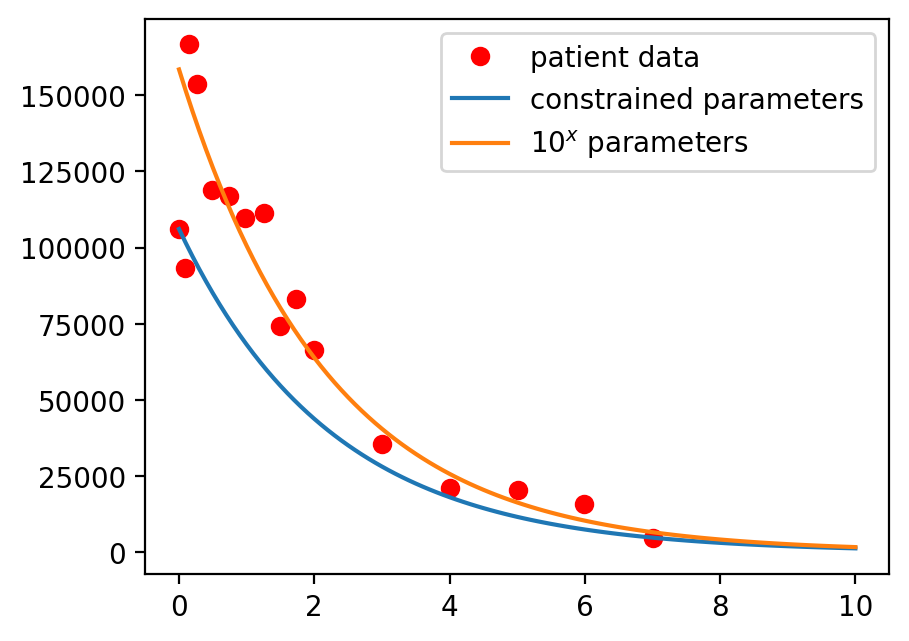

In [8]:
# original parameters
B = 0
A = 106100
beta = 1
alpha = 0.442516

plt.plot(hiv_num_days, hiv_num_virons, 'ro', label="patient data")
t = np.linspace(0, 10, 101)
v_t = A*np.e**(-alpha*t) + B*np.e**(-beta*t)
plt.plot(t, v_t, label="constrained parameters")

# alternative parameters
A = 10**5.2
B = 0
alpha = 10**1/22
beta = 10**0

v_t = A*np.e**(-alpha*t) + B*np.e**(-beta*t)
plt.plot(t, v_t, label="$10^x$ parameters")

plt.legend()

In [9]:
alpha

0.45454545454545453

todo
 read in the bacteria data
 
 
 

In [10]:
bacteria_df_a = "pmls-data-master/15novick/g149novickA.csv"
bacteria_data_a = np.loadtxt(bacteria_df_a, delimiter=',')
bacteria_df_b = "pmls-data-master/15novick/g149novickB.csv"
bacteria_data_b = np.loadtxt(bacteria_df_b, delimiter=',')

In [11]:
bacteria_data_a

array([[0.1699, 0.019 ],
       [0.4426, 0.0855],
       [0.5111, 0.1164],
       [0.7156, 0.1639],
       [1.0564, 0.247 ],
       [1.2041, 0.2803],
       [1.4311, 0.3278],
       [1.6465, 0.3563],
       [1.8283, 0.4038],
       [2.1119, 0.4537],
       [2.4182, 0.5059],
       [2.997 , 0.6152],
       [3.6763, 0.6746],
       [4.2308, 0.7126],
       [4.8316, 0.7981],
       [5.407 , 0.7601],
       [6.0646, 0.8599],
       [6.6638, 0.8741]])

In [12]:
bacteria_data_b

array([[2.38320e+00, 1.09000e-02],
       [2.72300e+00, 9.34290e-03],
       [3.03580e+00, 1.46000e-02],
       [3.51770e+00, 1.45000e-02],
       [4.00140e+00, 2.42000e-02],
       [4.56920e+00, 2.86000e-02],
       [5.05280e+00, 3.76000e-02],
       [5.53580e+00, 4.35000e-02],
       [6.44580e+00, 5.92000e-02],
       [7.52620e+00, 7.64000e-02],
       [8.58090e+00, 1.07100e-01],
       [9.63180e+00, 1.18200e-01],
       [1.08242e+01, 1.27800e-01],
       [1.20208e+01, 1.60000e-01],
       [1.31884e+01, 1.88500e-01],
       [1.42958e+01, 1.98900e-01],
       [2.27088e+01, 3.17300e-01],
       [2.48690e+01, 3.48600e-01],
       [2.67739e+01, 3.78400e-01],
       [2.89053e+01, 4.07500e-01]])

column 1 is time in hours
column 2 is Fraction of maximum beta-galactosidase activity.

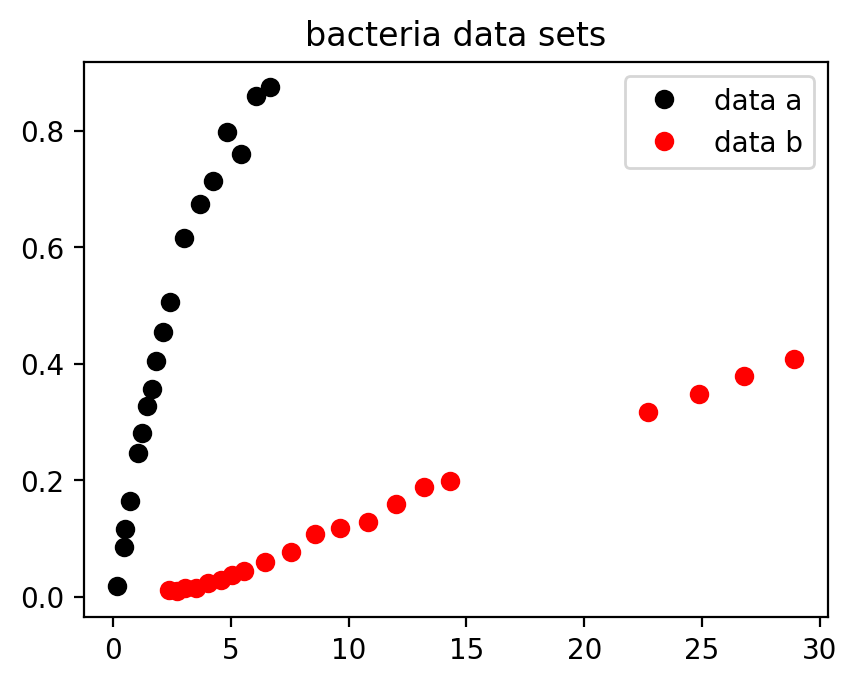

In [15]:
plt.plot(bacteria_data_a[:,0], bacteria_data_a[:,1], 'ko', label='data a')
plt.plot(bacteria_data_b[:,0],bacteria_data_b[:,1], 'ro', label='data b')
plt.title("bacteria data sets")
plt.legend()
plt.show()